In [1]:
import config
import utils
import model

from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

hidden_units = [256, 256]
learning_rate = 0.005
dropout_rate = 0.05
num_epochs = 200
batch_size = 256

Num_sensors = 8
num_classes = 6
path = 'C:/Users/hml76/Desktop/Jupyter/Paper1__renew/Github/UCI/'
lr_scheduler = LearningRateScheduler(model.step_decay, verbose=1)

## UCI EMG Gesture Recognition Dataset: K-Nearest Neighbor (K=1) Structure

In [2]:
data_processor = utils.build_data(path, Num_sensors)
#data_processor.data_save()

EMG_dataframe = utils.call_data(path)
Node_feature, X_train, y_train, X_test, y_test = utils.data_split(EMG_dataframe, ratio=0.2) #test ratio

Train data shape: (5522, 617)
Test data shape: (1390, 617)


In [3]:
graph_generator = config.Graph_CapgMyo(EMG_dataframe, Num_sensors)

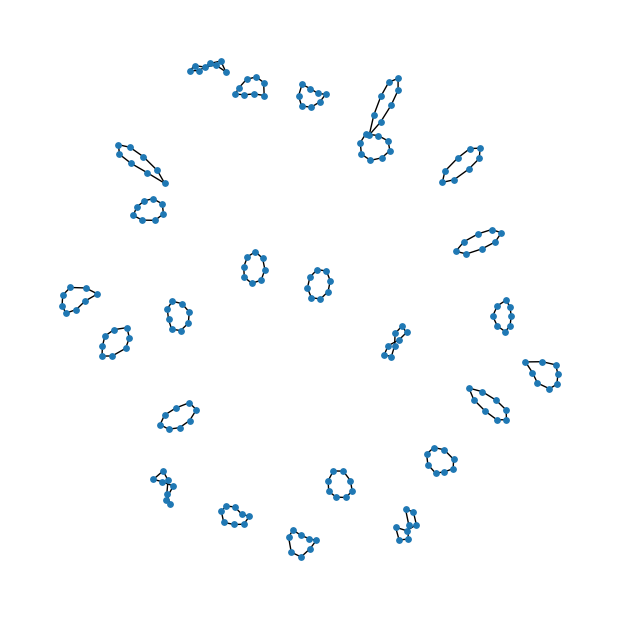

In [3]:
graph, edges, edge_weights = graph_generator.KNN1()
graph_generator.draw_graph(graph[:200])

In [4]:
graph, edges, edge_weights = graph_generator.KNN1()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN1_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/200
22/22 [==============================] - 9s 72ms/step - loss: 1.9412 - acc: 0.3088 - val_loss: 1.7910 - val_acc: 0.1605 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/200
22/22 [==============================] - 1s 35ms/step - loss: 1.6042 - acc: 0.3683 - val_loss: 1.6713 - val_acc: 0.3388 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/200
22/22 [==============================] - 1s 38ms/step - loss: 1.5262 - acc: 0.3827 - val_loss: 1.5812 - val_acc: 0.3232 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/200
22/22 [==============================] - 1s 36ms/step - loss: 1.4467 - acc: 0.4185 - val_loss: 1.5059 - val_acc: 0.3388 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/200
22/22 [==============================] - 1s 37ms/step - loss: 1.3754 - acc: 0.4354 - val_loss

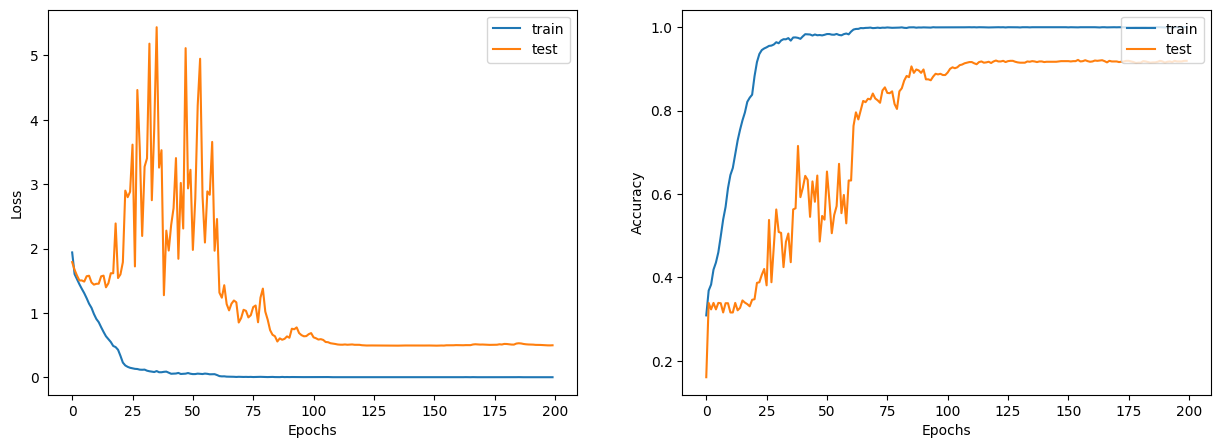

(None, 0.9215976595878601)

In [5]:
utils.display_learning_curves(history), max(history.history['val_acc'])

## UCI EMG Gesture Recognition Dataset: K-Nearest Neighbor + SW (K=1) Structure

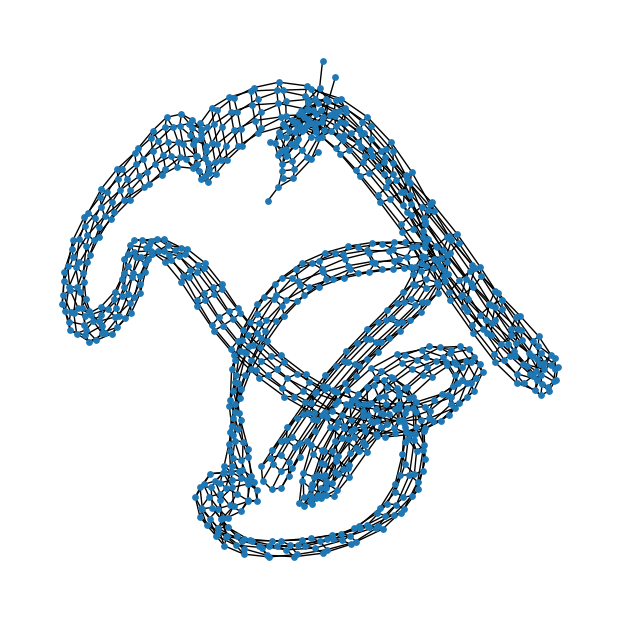

In [6]:
graph, edges, edge_weights = graph_generator.KNN1_SW()
graph_generator.draw_graph(graph[:1980])
#graph_generator.draw_graph(graph[:6200])

In [7]:
graph, edges, edge_weights = graph_generator.KNN1_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN1_SW_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/200
22/22 [==============================] - 8s 84ms/step - loss: 1.9353 - acc: 0.3203 - val_loss: 1.8118 - val_acc: 0.1605 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/200
22/22 [==============================] - 1s 41ms/step - loss: 1.5925 - acc: 0.3691 - val_loss: 1.6337 - val_acc: 0.3388 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/200
22/22 [==============================] - 1s 44ms/step - loss: 1.5118 - acc: 0.3964 - val_loss: 1.5523 - val_acc: 0.3232 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/200
22/22 [==============================] - 1s 43ms/step - loss: 1.4496 - acc: 0.4095 - val_loss: 1.5057 - val_acc: 0.3158 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/200
22/22 [==============================] - 1s 41ms/step - loss: 1.3691 - acc: 0.4451 - val_loss

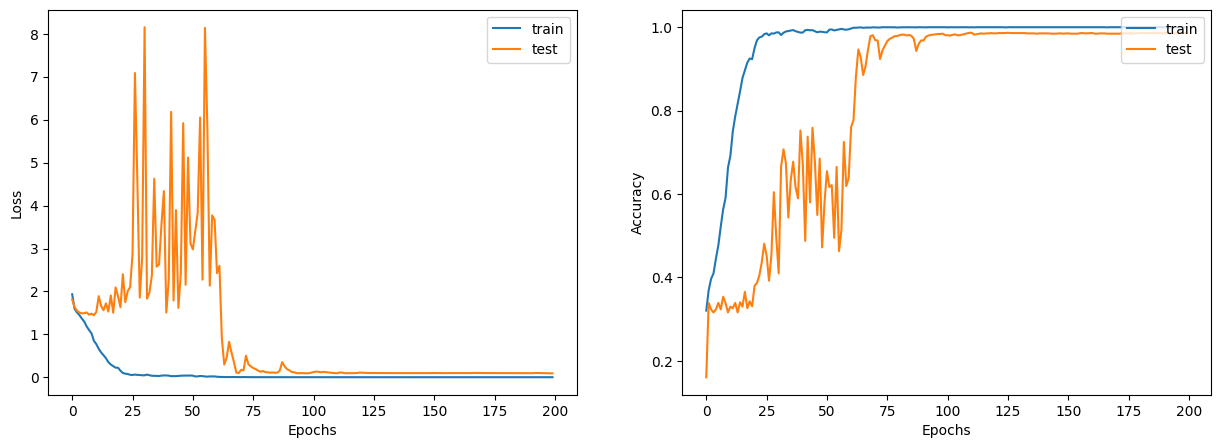

(None, 0.9866864085197449)

In [8]:
utils.display_learning_curves(history), max(history.history['val_acc'])

## UCI EMG Gesture Recognition Dataset: K-Nearest Neighbor Structure (K=2)

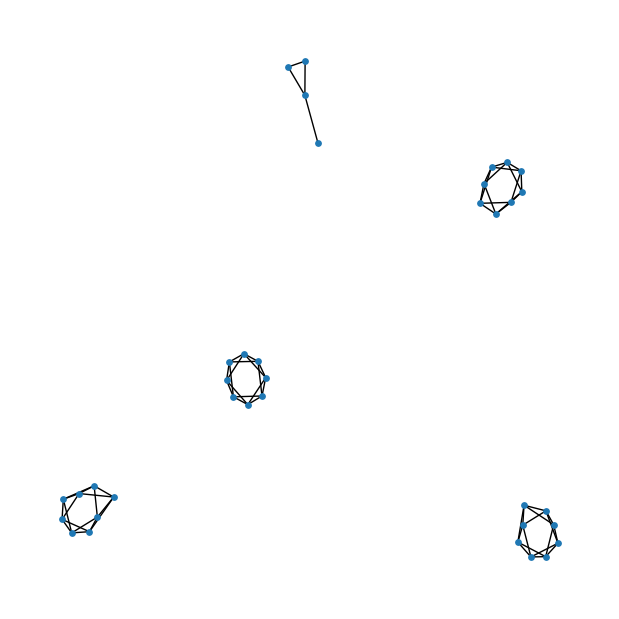

In [9]:
graph, edges, edge_weights = graph_generator.KNN2()
graph_generator.draw_graph(graph[:100])

In [10]:
graph, edges, edge_weights = graph_generator.KNN2()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN2_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/200
22/22 [==============================] - 8s 85ms/step - loss: 1.9482 - acc: 0.3140 - val_loss: 1.7384 - val_acc: 0.3388 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/200
22/22 [==============================] - 1s 48ms/step - loss: 1.6114 - acc: 0.3594 - val_loss: 1.6924 - val_acc: 0.3388 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/200
22/22 [==============================] - 1s 51ms/step - loss: 1.5069 - acc: 0.3969 - val_loss: 1.5397 - val_acc: 0.3388 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/200
22/22 [==============================] - 1s 53ms/step - loss: 1.4477 - acc: 0.4119 - val_loss: 1.5247 - val_acc: 0.3232 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/200
22/22 [==============================] - 1s 47ms/step - loss: 1.3779 - acc: 0.4335 - val_loss

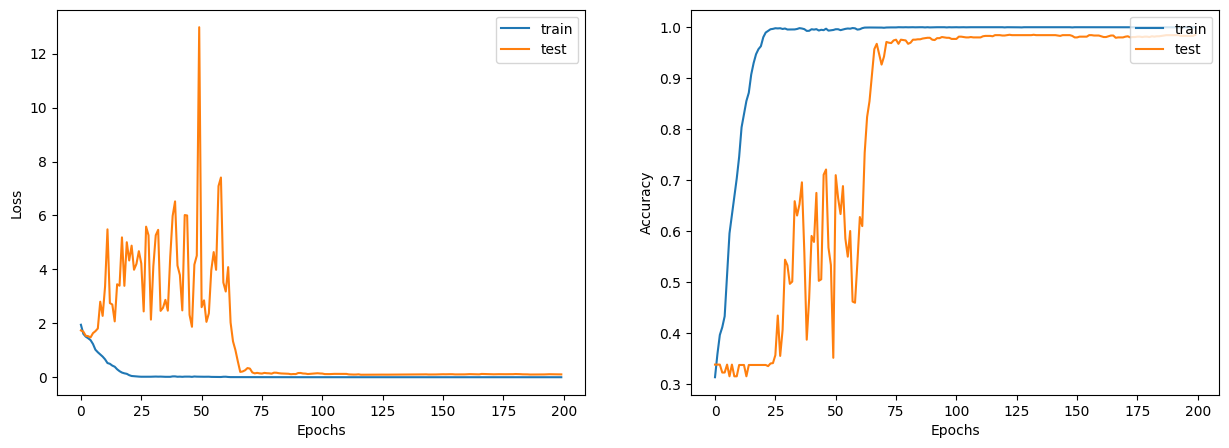

In [11]:
utils.display_learning_curves(history)

## UCI EMG Gesture Recognition Dataset: K-Nearest Neighbor + Sensor-Wise Structure (K=2) 

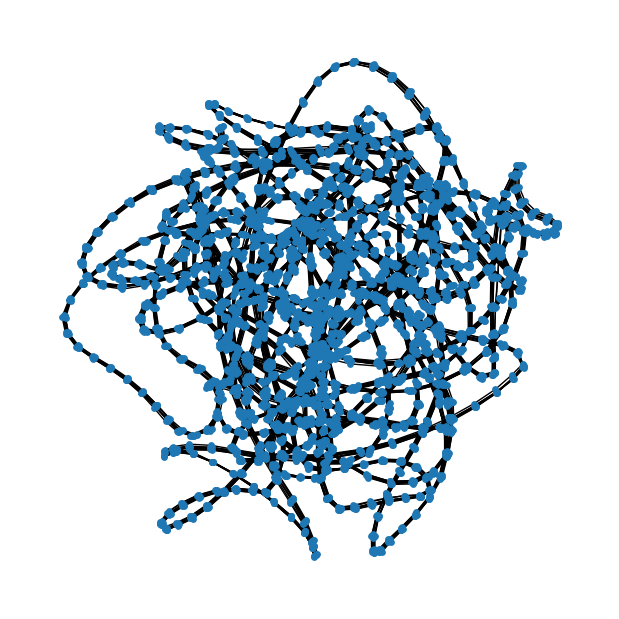

In [17]:
graph, edges, edge_weights = graph_generator.KNN2_SW()
graph_generator.draw_graph(graph)

In [15]:
graph, edges, edge_weights = graph_generator.KNN2_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN2_SW_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/200
22/22 [==============================] - 8s 91ms/step - loss: 1.9709 - acc: 0.3000 - val_loss: 1.8773 - val_acc: 0.1605 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/200
22/22 [==============================] - 1s 59ms/step - loss: 1.5965 - acc: 0.3824 - val_loss: 1.6699 - val_acc: 0.3180 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/200
22/22 [==============================] - 1s 59ms/step - loss: 1.5108 - acc: 0.3962 - val_loss: 1.5639 - val_acc: 0.3380 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/200
22/22 [==============================] - 1s 59ms/step - loss: 1.4416 - acc: 0.4225 - val_loss: 1.5220 - val_acc: 0.3232 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/200
22/22 [==============================] - 1s 58ms/step - loss: 1.3365 - acc: 0.4633 - val_loss

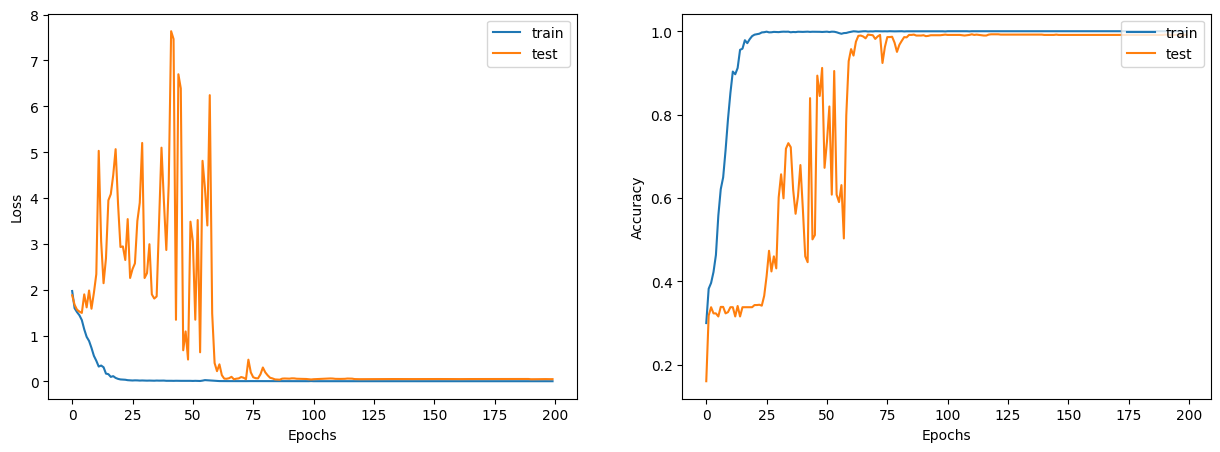

In [16]:
utils.display_learning_curves(history)

## UCI EMG Gesture Recognition Dataset: Fully Connected Structure (FC)

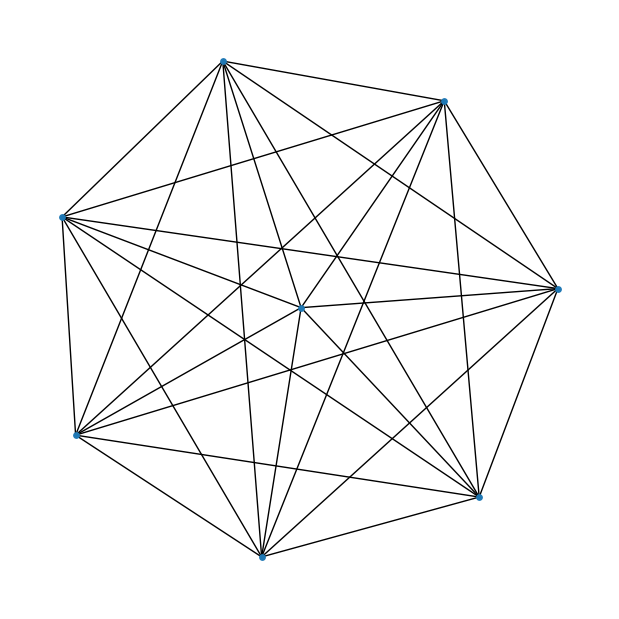

In [22]:
graph, edges, edge_weights = graph_generator.FC()
graph_generator.draw_graph(graph[:28])

In [24]:
graph, edges, edge_weights = graph_generator.FC()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="FC_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/200
22/22 [==============================] - 8s 87ms/step - loss: 1.9501 - acc: 0.3121 - val_loss: 1.7237 - val_acc: 0.3158 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/200
22/22 [==============================] - 1s 57ms/step - loss: 1.6012 - acc: 0.3719 - val_loss: 1.6253 - val_acc: 0.3388 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/200
22/22 [==============================] - 1s 58ms/step - loss: 1.5067 - acc: 0.3987 - val_loss: 1.5607 - val_acc: 0.3232 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/200
22/22 [==============================] - 1s 53ms/step - loss: 1.4429 - acc: 0.4167 - val_loss: 1.5127 - val_acc: 0.3232 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/200
22/22 [==============================] - 1s 53ms/step - loss: 1.3371 - acc: 0.4669 - val_loss

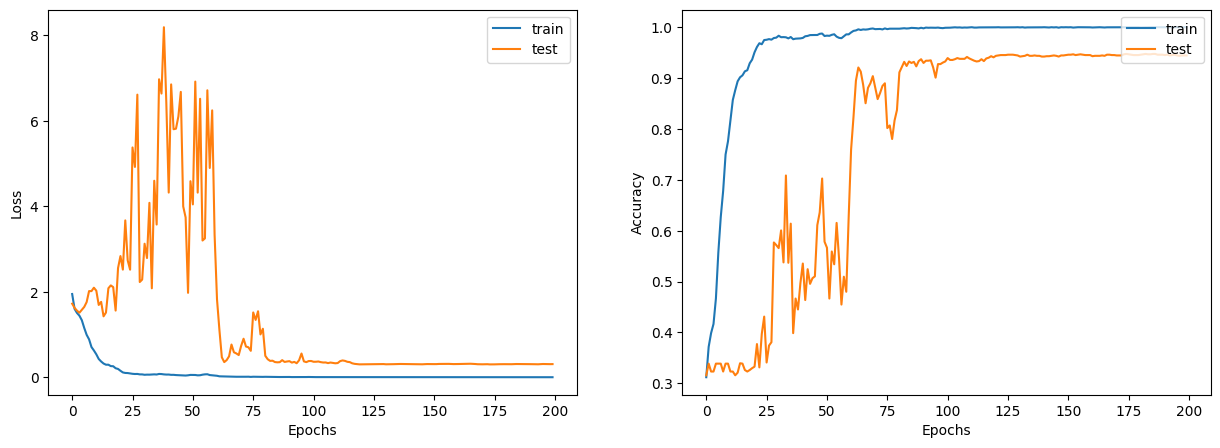

In [25]:
utils.display_learning_curves(history)

## UCI EMG Gesture Recognition Dataset: Fully Connected & Sensor-Wise Structure (FC+SW)

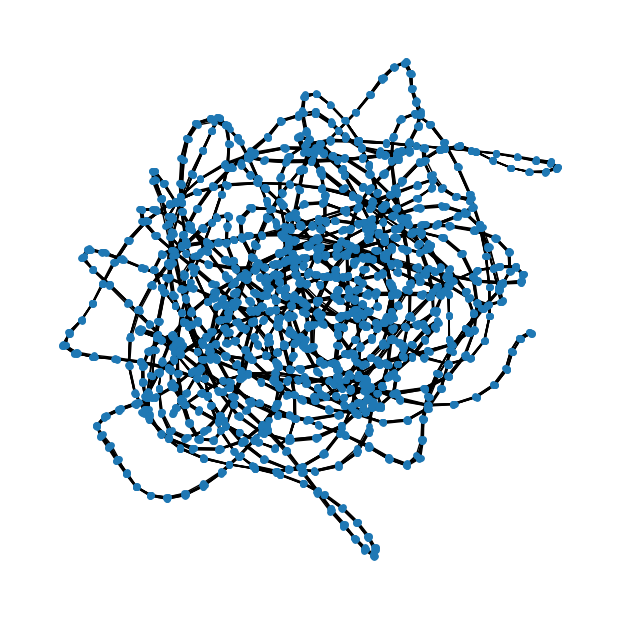

In [6]:
graph, edges, edge_weights = graph_generator.FC_SW()
graph_generator.draw_graph(graph)

In [7]:
graph, edges, edge_weights = graph_generator.FC_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="FC_SW_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/200
22/22 [==============================] - 11s 95ms/step - loss: 1.8927 - acc: 0.3401 - val_loss: 1.8020 - val_acc: 0.1647 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/200
22/22 [==============================] - 1s 55ms/step - loss: 1.5915 - acc: 0.3731 - val_loss: 1.8870 - val_acc: 0.1647 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/200
22/22 [==============================] - 1s 57ms/step - loss: 1.4973 - acc: 0.3979 - val_loss: 1.5606 - val_acc: 0.3331 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/200
22/22 [==============================] - 1s 58ms/step - loss: 1.4433 - acc: 0.4114 - val_loss: 1.4910 - val_acc: 0.3331 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/200
22/22 [==============================] - 1s 54ms/step - loss: 1.3492 - acc: 0.4553 - val_los

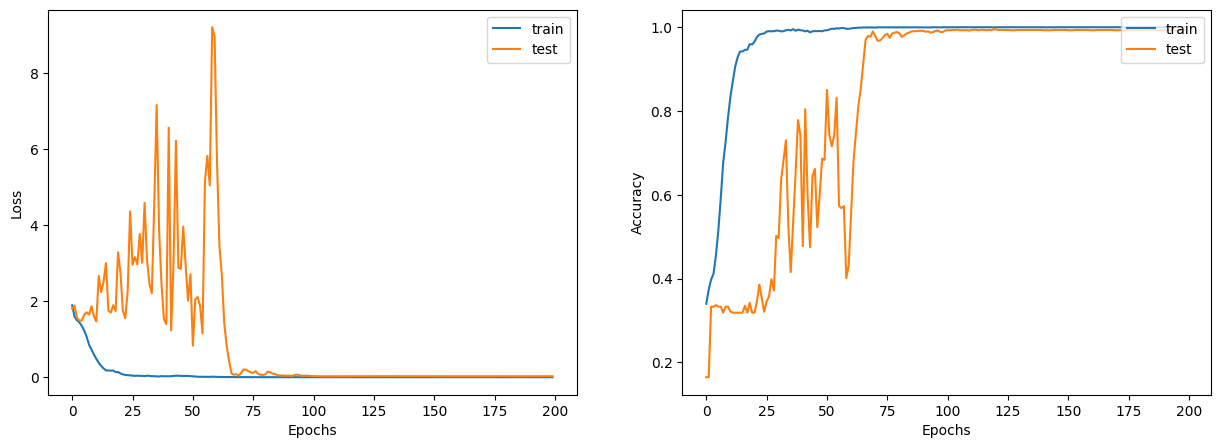

(None, 0.9949640035629272)

In [9]:
utils.display_learning_curves(history), max(history.history['val_acc'])